## `Latar Belakang`

Sebuah perusahaan yang bergerak dibidang **Store Retailer** ingin melakukan suatu promosi untuk pelanggannya. Tetapi perusahaan masih kesulitan dalam menentukan pelanggan mana yang memiliki potensi untuk menerima promosi tersebut, sehingga perusahaan meminta tim _Data Analyst_ untuk mengecek pelanggan mana yang berpotensi menerima promosi tersebut. Hal ini dimaksudkan agar promosi tepat sasaran.

## `Problem Statement`
Seperti yang telah disebutkan diatas, perusahaan ingin mengetahui segmen pelanggan yang seperti apa yang akan menerima promosi atau yang tidak akan menerima promosi tersebut. Hal ini akan berguna bagi perusahaan, sehingga perusahaan dapat menerima keuntungan yang maksimal atau bisa dikatakan strategi yang digunakan memiliki efektifitas yang baik.

Untuk mencapai hal diatas, kita sebagai tim Data Analyst akan mencoba menjawab pertanyaan-pertanyaan berikut:
1. Apakah campaign bisa dikatakan cukup **efektif** ? Asumsi bahwa tingkat kefektifan campaign dilihat dari total amount of spent. Asumsi ini diambil karena adanya keterbatasan data, khususnya untuk tidak adanya data mengenai berapa biaya yang dikeluarkan untuk mengadakan campaign dan berapa revenue yang dihasilkan pada setiap campaign.
2. Bagaimana pengaruh demografi customer terhadap **campaign** ? Hal ini dimaksudkan untuk mengetahui bagaimana segmentasi dari customer.
3. Dari segmentasi tersebut, **product** apa yang paling sering dibeli oleh customer ?
4. Di-**place** manakah customer banyak melakukan pembelian ?

## `Data`
Untuk menjawab pertanyaan di atas, kita akan menganalisa berdasarkan data supermarket customers yang sudah dikumpulkan oleh perusahaan. Dataset dapat diakses [di sini](https://drive.google.com/drive/folders/1WodnBbuYTvsF0-6HTuQABQ0KCS31lqbK)

1. Numerical: 
- Discrete: Kidhome, Teenhome, num_children, Recency, MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth
- Continue: Year_Birth, age, Income

2. Categorical:
- ordinal : Education, age_category, income_category
- nominal : ID, Marital_Status, has_child, Complain, AcceptedCmp1, AcceptedCmp2, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, Response, 

3. Datetime
<br>
Dt_Customer

In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

import sys
sys.path.append(r"C:\Users\faisa\Desktop\DataSciencePurwadhika\Modul2\CapstonProjectModul2\notebooks")
import function1 as fnc1

pd.set_option('display.max_columns', 50)

In [138]:
df = pd.read_csv(r'C:\Users\faisa\Desktop\DataSciencePurwadhika\Modul2\CapstonProjectModul2\data\processed\SupermarketCustomer.csv', parse_dates=['Dt_Customer'])
df.head()

,ID,Year_Birth,age,age_category,Education,Marital_Status,Income,income_category,Kidhome,Teenhome,num_children,has_child,Dt_Customer,Recency,Complain,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,total_amount,NumDealsPurchases,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,accept_campaign,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
0,5524,1957,55,middle-aged adults,Graduation,Single,58138.0,medium income,0,0,0,No,2012-09-04,58,0,635,88,546,172,88,88,1617,3,0,0,0,0,0,1,accept,8,10,4,7
1,2174,1954,60,old adults,Graduation,Single,46344.0,medium income,1,1,2,Yes,2014-03-08,38,0,11,1,6,2,1,6,27,2,0,0,0,0,0,0,never,1,1,2,5
2,4141,1965,48,middle-aged adults,Graduation,Married,71613.0,high income,0,0,0,No,2013-08-21,26,0,426,49,127,111,21,42,776,1,0,0,0,0,0,0,never,8,2,10,4
3,6182,1984,30,adults,Graduation,Married,26646.0,low income,1,0,1,Yes,2014-02-10,26,0,11,4,20,10,3,5,53,2,0,0,0,0,0,0,never,2,0,4,6
4,5324,1981,33,adults,PhD,Married,58293.0,medium income,1,0,1,Yes,2014-01-19,94,0,173,43,118,46,27,15,422,5,0,0,0,0,0,0,never,5,3,6,5


In [139]:
fnc1.checkdf(df)

----------------- df.info() -----------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   age                  2240 non-null   int64         
 3   age_category         2240 non-null   object        
 4   Education            2240 non-null   object        
 5   Marital_Status       2240 non-null   object        
 6   Income               2240 non-null   float64       
 7   income_category      2240 non-null   object        
 8   Kidhome              2240 non-null   int64         
 9   Teenhome             2240 non-null   int64         
 10  num_children         2240 non-null   int64         
 11  has_child            2240 non-null   object        
 12  Dt_Customer          2240 non-null   datetim

None

,ID,Year_Birth,age,Income,Kidhome,Teenhome,num_children,Dt_Customer,Recency,Complain,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,total_amount,NumDealsPurchases,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5597.126786,1968.909375,44.118750,52235.511102,0.444196,0.506250,0.950446,2013-07-10 10:01:42.857142784,49.109375,0.009375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,605.798214,2.325000,0.064286,0.013393,0.072768,0.074554,0.072768,0.149107,4.084821,2.662054,5.790179,5.316518
min,1.000000,1940.000000,16.000000,1730.000000,0.000000,0.000000,0.000000,2012-07-30 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2830.500000,1959.000000,36.000000,35538.750000,0.000000,0.000000,0.000000,2013-01-16 00:00:00,24.000000,0.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,68.750000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,3.000000,3.000000
50%,5468.000000,1970.000000,43.000000,51381.500000,0.000000,0.000000,1.000000,2013-07-08 12:00:00,49.000000,0.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,396.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2.000000,5.000000,6.000000
75%,8430.500000,1977.000000,54.000000,68325.000000,1.000000,1.000000,1.000000,2013-12-30 06:00:00,74.000000,0.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,1045.500000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,8.000000,7.000000
max,11191.000000,1996.000000,73.000000,666666.000000,2.000000,2.000000,3.000000,2014-06-29 00:00:00,99.000000,1.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,2525.000000,15.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,27.000000,28.000000,13.000000,20.000000
std,3246.613766,11.696638,11.733463,25055.289473,0.538398,0.544538,0.751803,NaN,28.962453,0.096391,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,602.249288,1.932238,0.245316,0.114976,0.259813,0.262728,0.259813,0.356274,2.778714,2.923101,3.250958,2.426645


,age_category,Education,Marital_Status,income_category,has_child,accept_campaign
count,2240,2240,2240,2240,2240,2240
unique,4,4,4,3,2,2
top,middle-aged adults,Graduation,Married,medium income,Yes,never
freq,1124,1127,1444,1120,1602,1631


>### 1. Is the campaign effective?

In [140]:
df.accept_campaign.value_counts()

accept_campaign
never     1631
accept     609
Name: count, dtype: int64

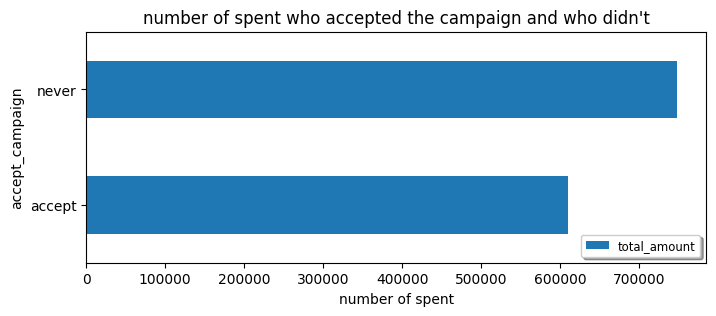

In [141]:
df.groupby('accept_campaign').agg({'total_amount':'sum'}).plot(kind='barh', title="number of spent who accepted the campaign and who didn't", xlabel='number of spent', figsize=(8,3))
plt.xticks(rotation=360)
plt.legend(loc='lower right', fontsize='small', fancybox=True, shadow=True);
# plt.annotate('max value', xytext=(30,1), xy=(10,1), verticalalignment='center')

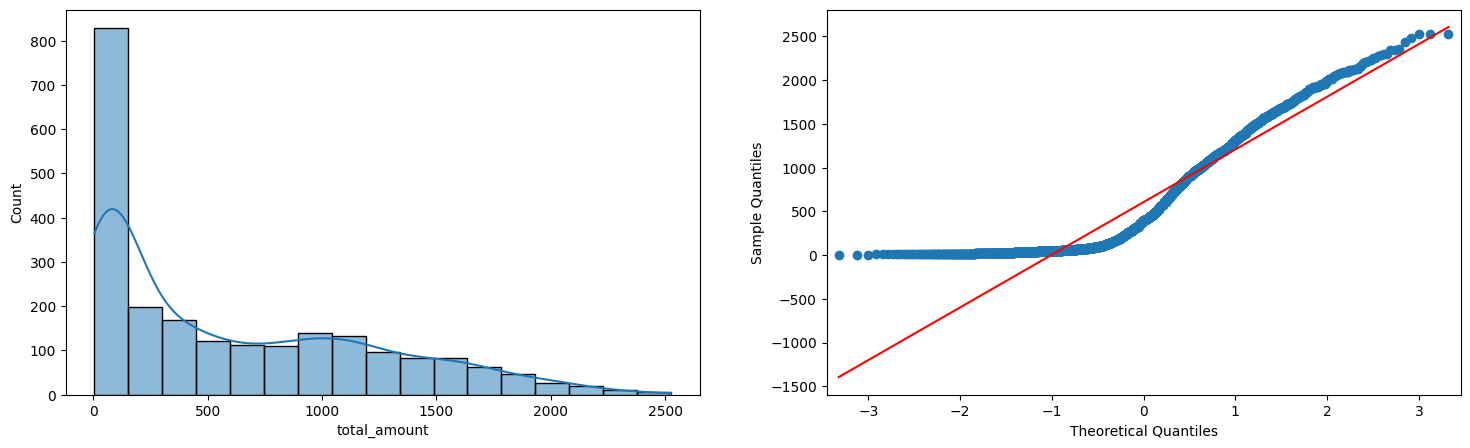

In [142]:
# make spent_category column in order to test whether the campaign makes the customer high spent or not ?

import statsmodels.api as sm
# check the distribution of total_amount first

# plot the graph to check the distribution
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(18,5))
sns.histplot(df['total_amount'], kde=True, ax=ax1)
sm.qqplot(df['total_amount'], line='s', ax=ax2)
plt.show()

- the distribution of total_amount data is not normal. So, we can use median as measure of central tendency and MAD as spreading value to make categorical column. But in this context, we only devided into **2 categories**, **high spent** and **low-medium spent**. Because we want to more focused on which customers spend more (high spend)

In [143]:
# make spent_category column

# median
median = df['total_amount'].median()

# MAD
from scipy.stats import median_abs_deviation
mad = median_abs_deviation(df['total_amount'])

df['spent_category'] = df.apply(fnc1.category, args=('total_amount', 'spent',median,mad,0,0,'not normal'), axis=1)

# make only 2 category: low-medium spent and high spent
df['spent_category'] = df['spent_category'].replace({'low spent' : 'low-medium spent', 'medium spent' : 'low-medium spent'})
df.head()

,ID,Year_Birth,age,age_category,Education,Marital_Status,Income,income_category,Kidhome,Teenhome,num_children,has_child,Dt_Customer,Recency,Complain,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,total_amount,NumDealsPurchases,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,accept_campaign,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,spent_category
0,5524,1957,55,middle-aged adults,Graduation,Single,58138.0,medium income,0,0,0,No,2012-09-04,58,0,635,88,546,172,88,88,1617,3,0,0,0,0,0,1,accept,8,10,4,7,high spent
1,2174,1954,60,old adults,Graduation,Single,46344.0,medium income,1,1,2,Yes,2014-03-08,38,0,11,1,6,2,1,6,27,2,0,0,0,0,0,0,never,1,1,2,5,low-medium spent
2,4141,1965,48,middle-aged adults,Graduation,Married,71613.0,high income,0,0,0,No,2013-08-21,26,0,426,49,127,111,21,42,776,1,0,0,0,0,0,0,never,8,2,10,4,high spent
3,6182,1984,30,adults,Graduation,Married,26646.0,low income,1,0,1,Yes,2014-02-10,26,0,11,4,20,10,3,5,53,2,0,0,0,0,0,0,never,2,0,4,6,low-medium spent
4,5324,1981,33,adults,PhD,Married,58293.0,medium income,1,0,1,Yes,2014-01-19,94,0,173,43,118,46,27,15,422,5,0,0,0,0,0,0,never,5,3,6,5,low-medium spent


##### perform hypothesis testing for proportion using Two Sample Z-Test

*assumption : whether a campaign is effective or not can be seen from the amount spent by the customer*
- Ho: total amount of customer who accept the campaign = total amount of customer who NEVER accept the campaign
- Ha: total amount of customer who accept the campaign > total amount of customer who NEVER accept the campaign

significance level (alpha) = 0.5

In [144]:
# customer data which accept campaign and has high spent
df_new = df.loc[df['accept_campaign'] == 'accept']

# customer data which never accept the campaign and low-medium spent
df_old = df.loc[df['accept_campaign'] == 'never']

In [145]:
# check the conversion rate of accept campaign customers
display(df_new['spent_category'].value_counts(),
f"conversion rate (proporsi spent) pada kelompok accept campaign = {(370/(df_new['spent_category'].value_counts()[0]+df_new['spent_category'].value_counts()[1]))*100}%")

spent_category
high spent          370
low-medium spent    239
Name: count, dtype: int64

'conversion rate (proporsi spent) pada kelompok accept campaign = 60.75533661740559%'

In [146]:
# check the conversion rate of never accept campaign customers
display(df_old['spent_category'].value_counts(),
f"conversion rate (proporsi spent) pada kelompok never accept campaign = {(453/(df_old['spent_category'].value_counts()[0]+df_old['spent_category'].value_counts()[1]))*100}%")

spent_category
low-medium spent    1178
high spent           453
Name: count, dtype: int64

'conversion rate (proporsi spent) pada kelompok never accept campaign = 27.774371551195586%'

In [147]:
# number of spent category
df_pivot = df[['accept_campaign','spent_category']].pivot_table(
    index= 'accept_campaign',
    columns= 'spent_category',
    values= 'spent_category',
    aggfunc= len
)

df_pivot

spent_category,high spent,low-medium spent
accept_campaign,,
accept,370,239
never,453,1178


In [148]:
# number of accept campaign and high spent
n_high_accept = df_pivot.loc['accept', 'high spent']

# number of never accept campaign and high spent
n_high_never = df_pivot.loc['never', 'high spent']

# number of accept customers
n_accept = df_pivot.sum(axis=1)['accept']

# number of never accept customers
n_never = df_pivot.sum(axis=1)['never']


# perform statistical test
from statsmodels.stats.proportion import proportions_ztest 

stat, pvalue = proportions_ztest(
    count= [n_high_accept, n_high_never],   # jumlah spent di kelompok accept dan kelompok never accept
    nobs= [n_accept, n_never],              # jumlah seluruh kelompok accept dan jumlah seluruh kelompok never accept
    alternative='larger'                    # Ha (lebih besar)
)

pvalue = pvalue/2

# conclusion

if pvalue > 0.05:
    print(f'''
    Pvalue = {pvalue}. Pvalue > 0.05. Menerima Ho.
    Kita punya cukup bukti untuk mengatakan bahwa campaign tidak efektif (total amount of customer who accept the campaign = total amount of customer who NEVER accept the campaign).
    (Proporsinya TIDAK berbeda signifikan)
    ''')

else:
    print(f'''
    Pvalue = {pvalue}. Pvalue <= 0.05. Menerima Ha.
    Kita punya cukup bukti untuk mengatakan bahwa campaign efektif (total amount of customer who accept the campaign > total amount of customer who NEVER accept the campaign).
    (Proporsinya berbeda signifikan)
    ''')


    Pvalue = 1.1890009998712533e-47. Pvalue <= 0.05. Menerima Ha.
    Kita punya cukup bukti untuk mengatakan bahwa campaign efektif (total amount of customer who accept the campaign > total amount of customer who NEVER accept the campaign).
    (Proporsinya berbeda signifikan)
    


**_Insight:_**
<br>
It turns out that even though the number of customers who accept the campaign is less, which is **27.19%**, but after doing statistics test using the proportion **two sample z-test**, it turns out that the campaign can be said to be **effective** or **successful** because customers who accept the campaign **spend more** of their money than those who never accept the campaign.
<br>
Although when viewed from the graph the total amount generated from the **never accept campaign group** is **more** than the group that accepts the campaign (at least once), this **bias** can occur because the **number of data** that never accepts the campaign is **more** than those who accept the campaign, so **naturally** the total amount is much more. But, we already validate using statistical test, that the campaign has indeed been **effective**.

In [149]:
df_accept = df_new.copy()
df_accept

,ID,Year_Birth,age,age_category,Education,Marital_Status,Income,income_category,Kidhome,Teenhome,num_children,has_child,Dt_Customer,Recency,Complain,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,total_amount,NumDealsPurchases,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,accept_campaign,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,spent_category
0,5524,1957,55,middle-aged adults,Graduation,Single,58138.000000,medium income,0,0,0,No,2012-09-04,58,0,635,88,546,172,88,88,1617,3,0,0,0,0,0,1,accept,8,10,4,7,high spent
8,4855,1974,39,adults,PhD,Married,30351.000000,low income,1,0,1,Yes,2013-06-06,19,0,14,0,24,3,3,2,46,1,0,0,0,0,0,1,accept,3,0,2,9,low-medium spent
9,5899,1950,64,old adults,PhD,Married,5648.000000,low income,1,1,2,Yes,2014-03-13,68,0,28,0,6,1,1,13,49,1,0,0,1,0,0,0,accept,1,0,0,20,low-medium spent
14,2114,1946,66,old adults,PhD,Single,82800.000000,high income,0,0,0,No,2012-11-24,23,0,1006,22,115,59,68,45,1315,1,1,0,0,0,1,1,accept,7,6,12,3,high spent
17,6565,1949,64,old adults,Master,Married,76995.000000,high income,0,1,1,Yes,2013-03-28,91,0,1012,80,498,0,16,176,1782,2,1,0,0,0,0,0,accept,11,4,9,5,high spent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2215,9405,1954,58,middle-aged adults,PhD,Married,52869.000000,medium income,1,1,2,Yes,2012-10-15,40,0,84,3,61,2,1,21,172,3,0,0,0,0,0,1,accept,3,1,4,7,low-medium spent
2227,2437,1989,24,adults,Graduation,Married,41580.000000,medium income,0,0,0,No,2013-06-03,69,0,861,138,461,60,30,61,1611,1,1,0,0,1,0,0,accept,6,5,12,3,high spent
2228,2863,1970,43,middle-aged adults,Graduation,Single,53187.000000,medium income,1,2,3,Yes,2013-08-23,67,0,738,20,172,52,50,20,1052,6,1,0,0,1,0,0,accept,2,3,10,7,high spent
2238,5250,1943,70,old adults,Master,Widow,71335.500000,high income,0,0,0,No,2013-10-30,75,0,532,126,490,164,126,126,1564,1,0,0,0,0,1,1,accept,5,5,11,1,high spent


>### 2. How does each categorical columns affect accept campaigns (promotion)?

**Categorical columns : age category, education, income category, marital status, and has child/not**

In [150]:
# Table proportion each category terhadap yang accept campaign atau never accept campaign

# age category
dfAge = pd.crosstab(df['age_category'], df['accept_campaign'], normalize='index')

# education
dfEdu = pd.crosstab(df['Education'], df['accept_campaign'], normalize='index')

# income category
dfIncome = pd.crosstab(df['income_category'], df['accept_campaign'], normalize='index')

# marital status
dfMarital = pd.crosstab(df['Marital_Status'], df['accept_campaign'], normalize='index')

# has child/not
dfChild = pd.crosstab(df['has_child'], df['accept_campaign'], normalize='index')

In [151]:
display(
        "Table contingency age category",
        dfAge, # age category
        
        "Table contingency education",
        dfEdu, # Education
        
        "Table contingency income category",
        dfIncome, # income_category
        
        "Table contingency marital status",
        dfMarital, # Marital_Status
        
        "Table contingency has child",
        dfChild # has_child
)

'Table contingency age category'

accept_campaign,accept,never
age_category,,
adults,0.253874,0.746126
middle-aged adults,0.276690,0.723310
old adults,0.302920,0.697080
teenagers,0.666667,0.333333


'Table contingency education'

accept_campaign,accept,never
Education,,
Basic,0.129630,0.870370
Graduation,0.264419,0.735581
Master,0.254799,0.745201
PhD,0.325103,0.674897


'Table contingency income category'

accept_campaign,accept,never
income_category,,
high income,0.483421,0.516579
low income,0.142596,0.857404
medium income,0.226786,0.773214


'Table contingency marital status'

accept_campaign,accept,never
Marital_Status,,
Divorced,0.297414,0.702586
Married,0.250693,0.749307
Single,0.310062,0.689938
Widow,0.350649,0.649351


'Table contingency has child'

accept_campaign,accept,never
has_child,,
No,0.446708,0.553292
Yes,0.202247,0.797753


#### Using hypothesis testing for proportion using **chi-square test**
Test independency/relationship between 2 categorical variables (**each categorical columns** and **promotion columns**). We will test whether the each categorical columns is independence/dependence to the promotion columns (campaign).
<br>
- Ho: each categorical columns dan campaign tidak terkait/independent (proporsinya sama)
- Ha: each categorical columns dan campaign terkait/dependent (proporsinya berbeda signifikan)

In [152]:
#import chi2_contingency library
from scipy.stats import chi2_contingency

# campaign columns
cols = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']

# categorical columns
category = ['age_category', 'Education', 'income_category', 'Marital_Status', 'has_child']

for cat in category:
    # input dari function chi2_contingency ini berupa crosstab
    stat, pvalue, dof, expexted = chi2_contingency(df_accept.groupby(cat)[cols].agg('sum'))

    # conclusion
    if pvalue > 0.05:
        print(f'''
        Pvalue = {pvalue}. Pvalue > 0.05. Menerima Ho.
        Kita TIDAK punya cukup bukti untuk mengatakan bahwa {cat} dan campaign terkait/dependent.
        (Proporsinya TIDAK berbeda signifikan)
        ''')

    else:
        print(f'''
        Pvalue = {pvalue}. Pvalue <= 0.05. Menerima Ha.
        Kita punya cukup bukti untuk mengatakan bahwa {cat} dan campaign terkait/dependent.
        (Proporsinya berbeda signifikan)
        ''')


        Pvalue = 0.015401978861993548. Pvalue <= 0.05. Menerima Ha.
        Kita punya cukup bukti untuk mengatakan bahwa age_category dan campaign terkait/dependent.
        (Proporsinya berbeda signifikan)
        

        Pvalue = 0.009958599935671697. Pvalue <= 0.05. Menerima Ha.
        Kita punya cukup bukti untuk mengatakan bahwa Education dan campaign terkait/dependent.
        (Proporsinya berbeda signifikan)
        

        Pvalue = 1.6781191250898553e-54. Pvalue <= 0.05. Menerima Ha.
        Kita punya cukup bukti untuk mengatakan bahwa income_category dan campaign terkait/dependent.
        (Proporsinya berbeda signifikan)
        

        Pvalue = 0.0029113016999780706. Pvalue <= 0.05. Menerima Ha.
        Kita punya cukup bukti untuk mengatakan bahwa Marital_Status dan campaign terkait/dependent.
        (Proporsinya berbeda signifikan)
        

        Pvalue = 3.753705651613539e-29. Pvalue <= 0.05. Menerima Ha.
        Kita punya cukup bukti untuk mengatakan bahwa

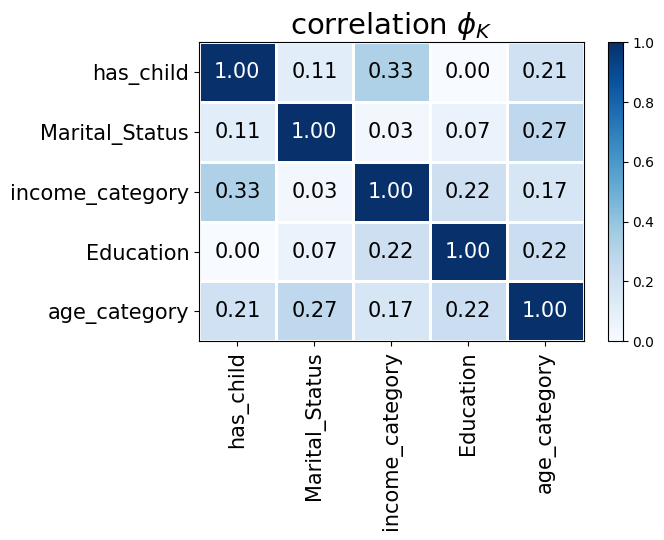

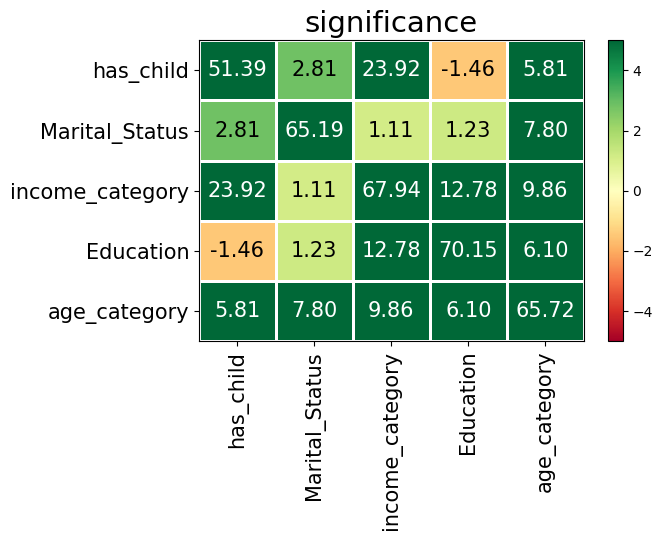

In [153]:
# correlation between Year_Birth, Education, Marital Status, and Income using phik correlation package

# import module
import phik
from phik.report import plot_correlation_matrix
from phik import report

# phik correlation
phik_overview = df[category].phik_matrix(interval_cols=['Year_Birth', 'Income'])

plot_correlation_matrix(phik_overview.values, x_labels=phik_overview.columns, y_labels=phik_overview.index, 
                        vmin=0, vmax=1, color_map='Blues', title=r'correlation $\phi_K$', fontsize_factor=1.5,
                        figsize=(7,5.5))

# significance between those columns
significance_overview = df[category].significance_matrix(interval_cols=['Year_Birth', 'Income'])

plot_correlation_matrix(significance_overview.fillna(0).values, x_labels=significance_overview.columns, 
                        y_labels=significance_overview.index, vmin=-5, vmax=5, title='significance', 
                        usetex=False, fontsize_factor=1.5, figsize=(7,5.5))

plt.tight_layout()

**_insight_**:
<br>
- Berdasarkan phik correlation diatas, untuk mengurangi kardinalitas data, maka saya membagi menjadi 3 kelompok. Kelompok 1 dilihat berdasarkan `income category dan education`, Kelompok 2 dilihat berdasarkan `marital status dan has child/not`, dan Kelompok 3 dilihat berdasarkan `age category`. Hal ini dilakukan untuk mengurangi kardinalitas data karena adanya keterbatasan jumlah data.
- Berdasarkan uji statistik, kita punya cukup bukti untuk mengatakan bahwa semua kategorikal kolom di atas **berpengaruh(dependent)** ke campaign columns.

In [154]:
# make DataFrame category vs campaign in melting format

# return outlier_significance_data[0]: age category ; outlier_significance_data[1]: Education ;  outlier_significance_data[2]: income_category, etc
outlier_significance_data = []

for cat in category:
    df_accept_melted = df_accept.melt(
        id_vars=cat, # category columns
        value_vars=cols, # campaign columns
        var_name='campaign',
        value_name='accepted_campaign_ke-n' 
    )
    # filter only who accept the campaign
    df_accept_melted = df_accept_melted.loc[df_accept_melted["accepted_campaign_ke-n"] != 0] # filter only accept campaign (accepted_campaign_ke-n == 1)
    # diplay all DataFrame
    display(df_accept_melted.head(), df_accept_melted.shape)
    # outlier_significance data
    outlier_significance_overview = df_accept_melted[[cat, 'campaign']].outlier_significance_matrix()
    # append into empty list
    outlier_significance_data.append(outlier_significance_overview)

,age_category,campaign,accepted_campaign_ke-n
3,old adults,AcceptedCmp1,1
4,old adults,AcceptedCmp1,1
11,adults,AcceptedCmp1,1
16,adults,AcceptedCmp1,1
22,middle-aged adults,AcceptedCmp1,1


(1001, 3)

,Education,campaign,accepted_campaign_ke-n
3,PhD,AcceptedCmp1,1
4,Master,AcceptedCmp1,1
11,Graduation,AcceptedCmp1,1
16,Master,AcceptedCmp1,1
22,Graduation,AcceptedCmp1,1


(1001, 3)

,income_category,campaign,accepted_campaign_ke-n
3,high income,AcceptedCmp1,1
4,high income,AcceptedCmp1,1
11,high income,AcceptedCmp1,1
16,high income,AcceptedCmp1,1
22,medium income,AcceptedCmp1,1


(1001, 3)

,Marital_Status,campaign,accepted_campaign_ke-n
3,Single,AcceptedCmp1,1
4,Married,AcceptedCmp1,1
11,Divorced,AcceptedCmp1,1
16,Single,AcceptedCmp1,1
22,Single,AcceptedCmp1,1


(1001, 3)

,has_child,campaign,accepted_campaign_ke-n
3,No,AcceptedCmp1,1
4,Yes,AcceptedCmp1,1
11,No,AcceptedCmp1,1
16,Yes,AcceptedCmp1,1
22,Yes,AcceptedCmp1,1


(1001, 3)

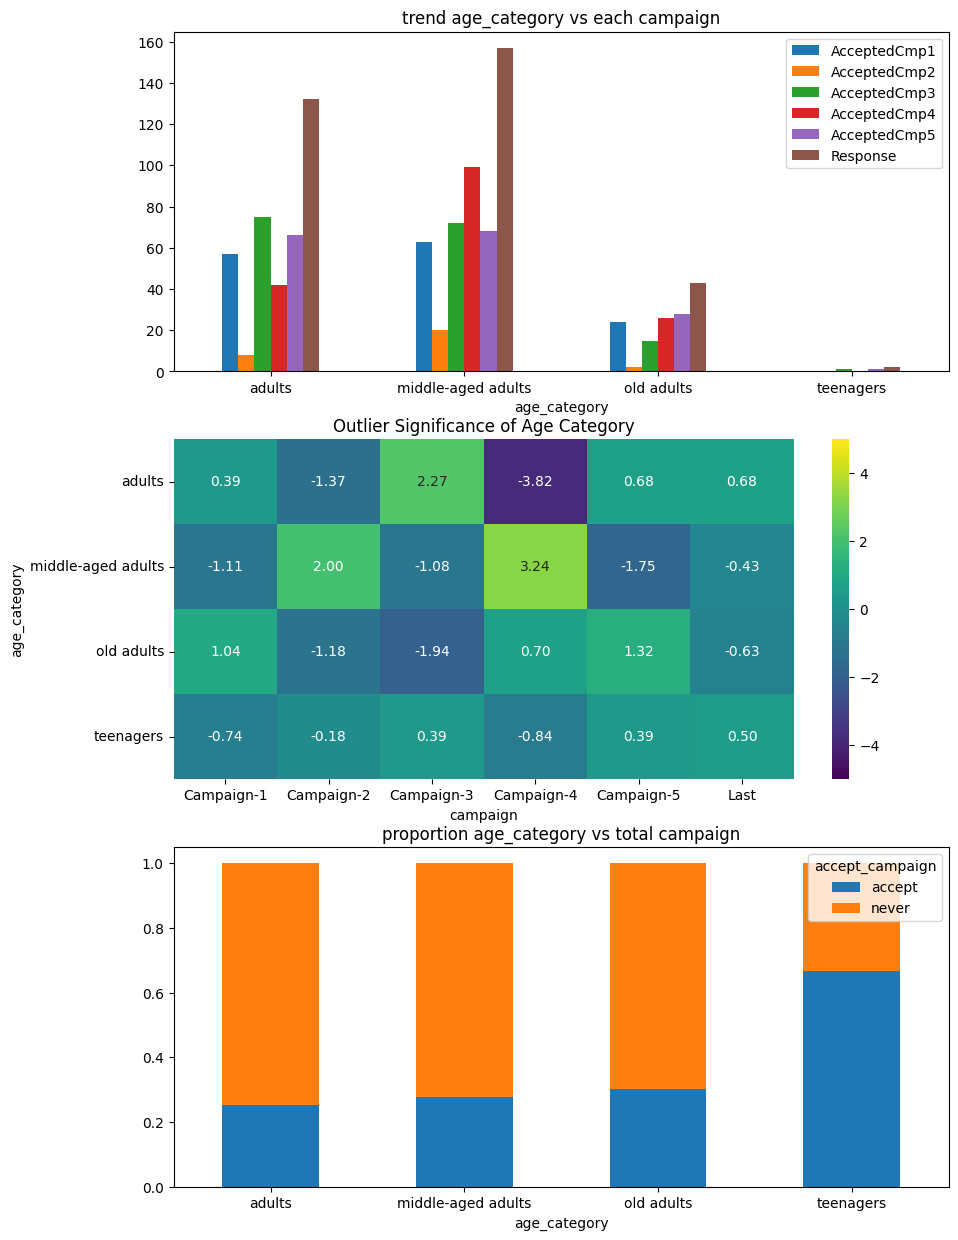

In [155]:
# analisa age category vs campaign columns
outlierAge = outlier_significance_data[0]

# heatmap xticks labels
x_axis_labels = ['Campaign-1','Campaign-2','Campaign-3','Campaign-4','Campaign-5','Last']

fig, (ax1,ax2,ax3) = plt.subplots(nrows=3, ncols=1, figsize=(10,15))

# plot data
df.groupby('age_category')[cols].agg('sum').plot(kind='bar', ax=ax1)
sns.heatmap(outlierAge, vmin=-5, vmax=5, annot=True, cmap="viridis", fmt=".2f", xticklabels=x_axis_labels, ax=ax2)
dfAge.plot(kind='bar', stacked=True, ax=ax3)

# rotate xtickslabel
ax1.tick_params(axis='x', labelrotation=360)
ax2.tick_params(axis='x', labelrotation=360)
ax3.tick_params(axis='x', labelrotation=360)

# set title
ax1.set_title('trend age_category vs each campaign')
ax2.set_title('Outlier Significance of Age Category')
ax3.set_title('proportion age_category vs total campaign')

plt.show()

**_Insight_**:
<br>
1. **Age categories** --> insight can be drawn that `teenagers (13 years old through 17 years old)` effective enough in accept campaign than other age categories. Tetapi karena keterbatasan data pada kelom `teenagers`, saya mengambil kelompok umur `old adults (older than 59 years old)` untuk age categories-nya. Berdasarkan grafik outlier significance kelompot umur `old adults` lebih banyak menerima campaign pada `campaign ke-5`.

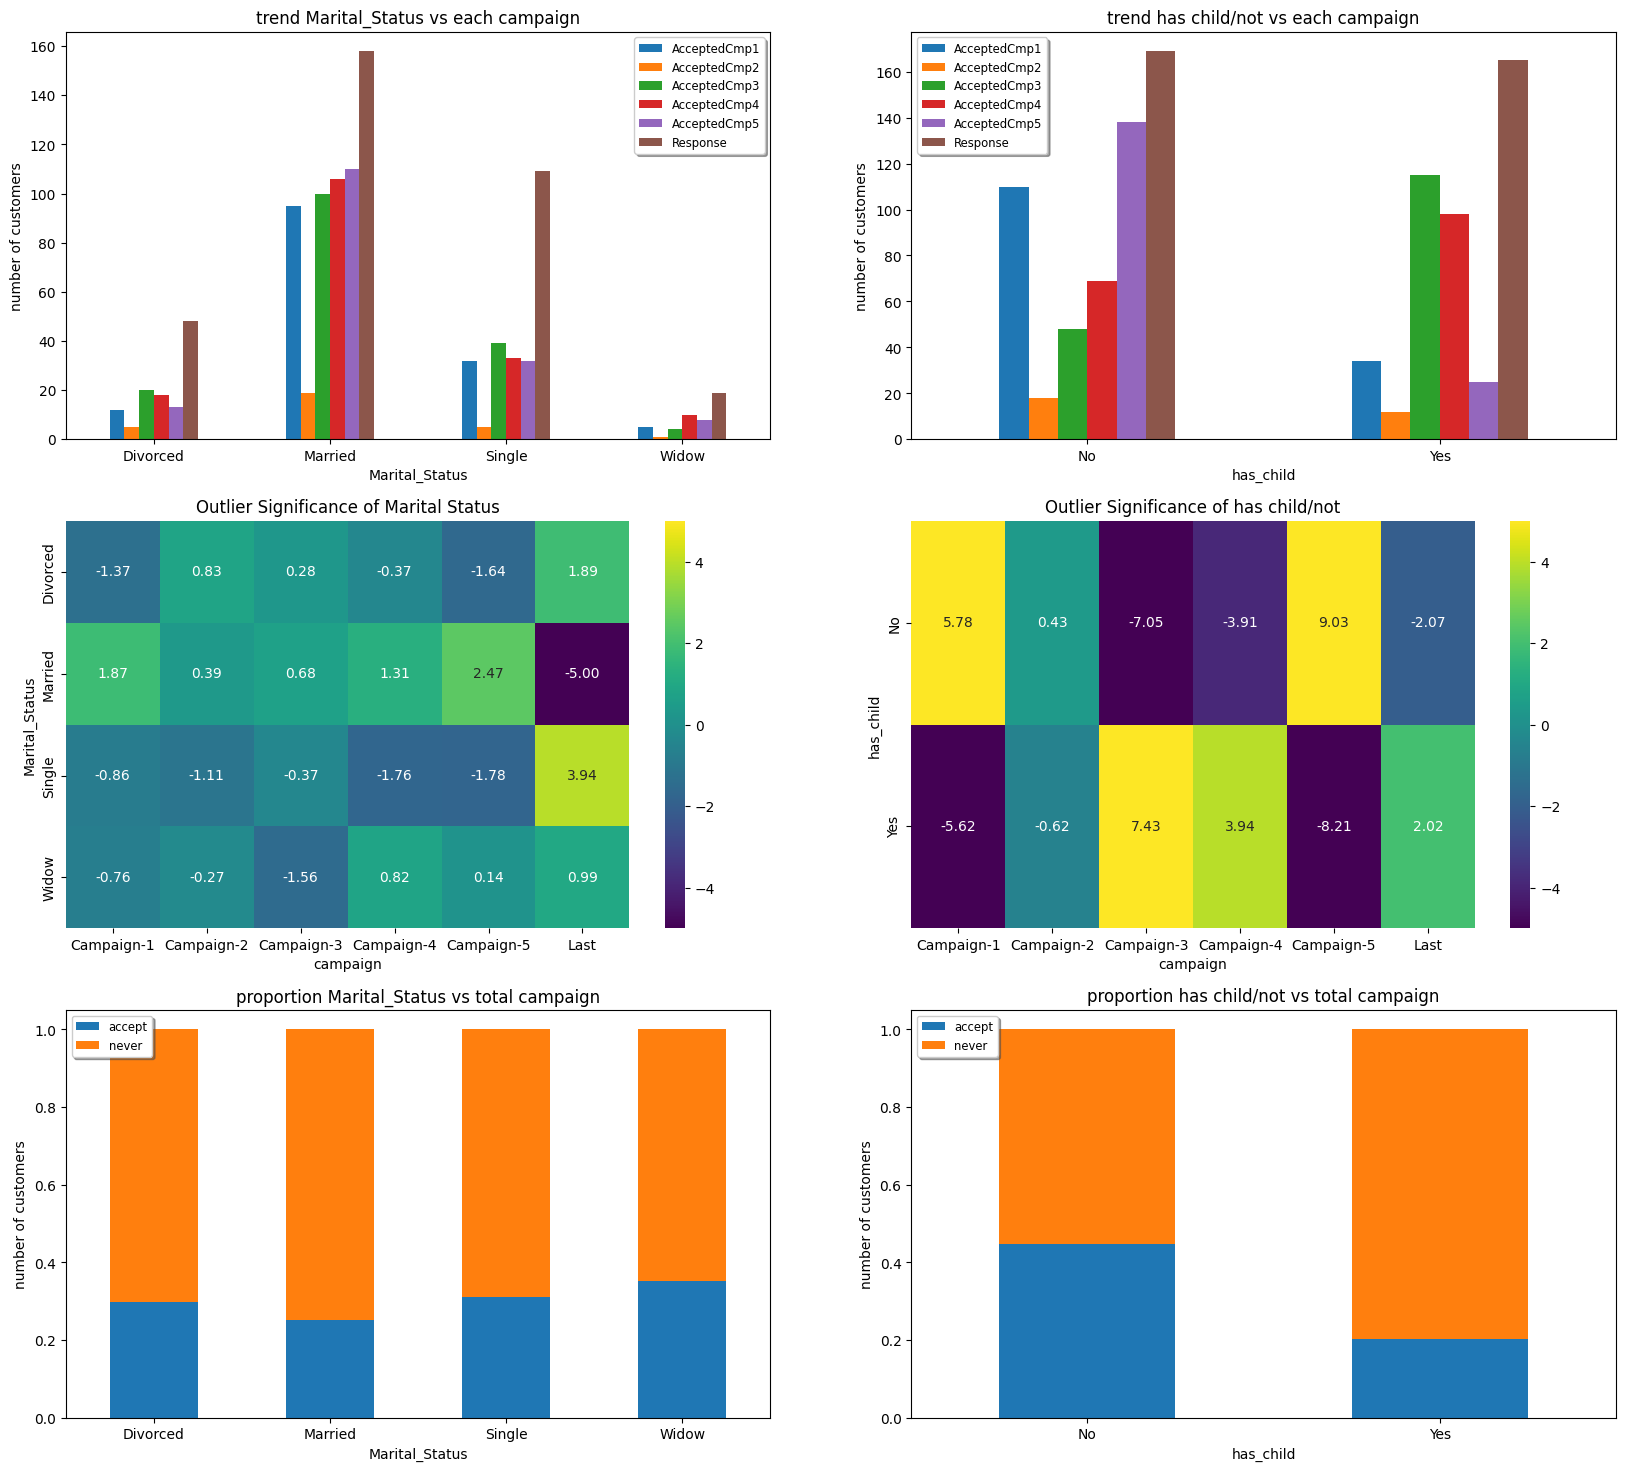

In [156]:
# outlier data for age_category, Marital_Status, has_child
outlierMarital = outlier_significance_data[3]
outlierChild = outlier_significance_data[4]

# plot age_category, Marital_Status, has_child
fig, ((ax1,ax2), (ax3,ax4), (ax5,ax6)) = plt.subplots(nrows=3, ncols=2, figsize=(20,18))

axEach = [ax1,ax2]
axOutlier = [ax3,ax4]
axTotal = [ax5,ax6]
dfProp = ['dfMarital', 'dfChild']
outlierData = ['outlierMarital', 'outlierChild']
colList = ['Marital_Status', 'has_child']
titleEach = ['trend Marital_Status vs each campaign', 'trend has child/not vs each campaign']
titleTotal = ['proportion Marital_Status vs total campaign', 'proportion has child/not vs total campaign']
titleOutlier = ['Outlier Significance of Marital Status', 'Outlier Significance of has child/not']

for i in zip(axEach, axOutlier, axTotal, dfProp, outlierData, colList, titleEach, titleTotal, titleOutlier):
    # plot data
    df.groupby(i[5])[cols].agg('sum').plot(kind='bar', ax=i[0])
    sns.heatmap(eval(i[4]), vmin=-5, vmax=5, annot=True, cmap="viridis", fmt=".2f", xticklabels=x_axis_labels, ax=i[1])
    eval(i[3]).plot(kind='bar', stacked=True, ax=i[2])
    # set title
    i[0].set_title(i[-3])
    i[1].set_title(i[-1])
    i[2].set_title(i[-2])
    # set x label rotation
    i[0].tick_params(axis='x', labelrotation=360)
    i[1].tick_params(axis='x', labelrotation=360)
    i[2].tick_params(axis='x', labelrotation=360)
    # set y label
    i[0].set_ylabel('number of customers')
    i[2].set_ylabel('number of customers')
    # set legend
    i[0].legend(loc='best', fontsize='small', fancybox=True, shadow=True)
    i[2].legend(loc='upper left', fontsize='small', fancybox=True, shadow=True)

**_Insight_**:
<br>
1. **Marital status** --> insight can be drawn that `widow` effective enough in accept campaign than other marital status category. Berdasarkan grafik outlier significance marital status `widow` lebih banyak menerima campaign pada `last campaign`.
2. **Has child/not** --> insight can be drawn that `has no child` effective enough in accept campaign than customer who has child. Berdasarkan grafik outlier significance, `has no child` lebih banyak menerima campaign pada `campaign ke-5`.

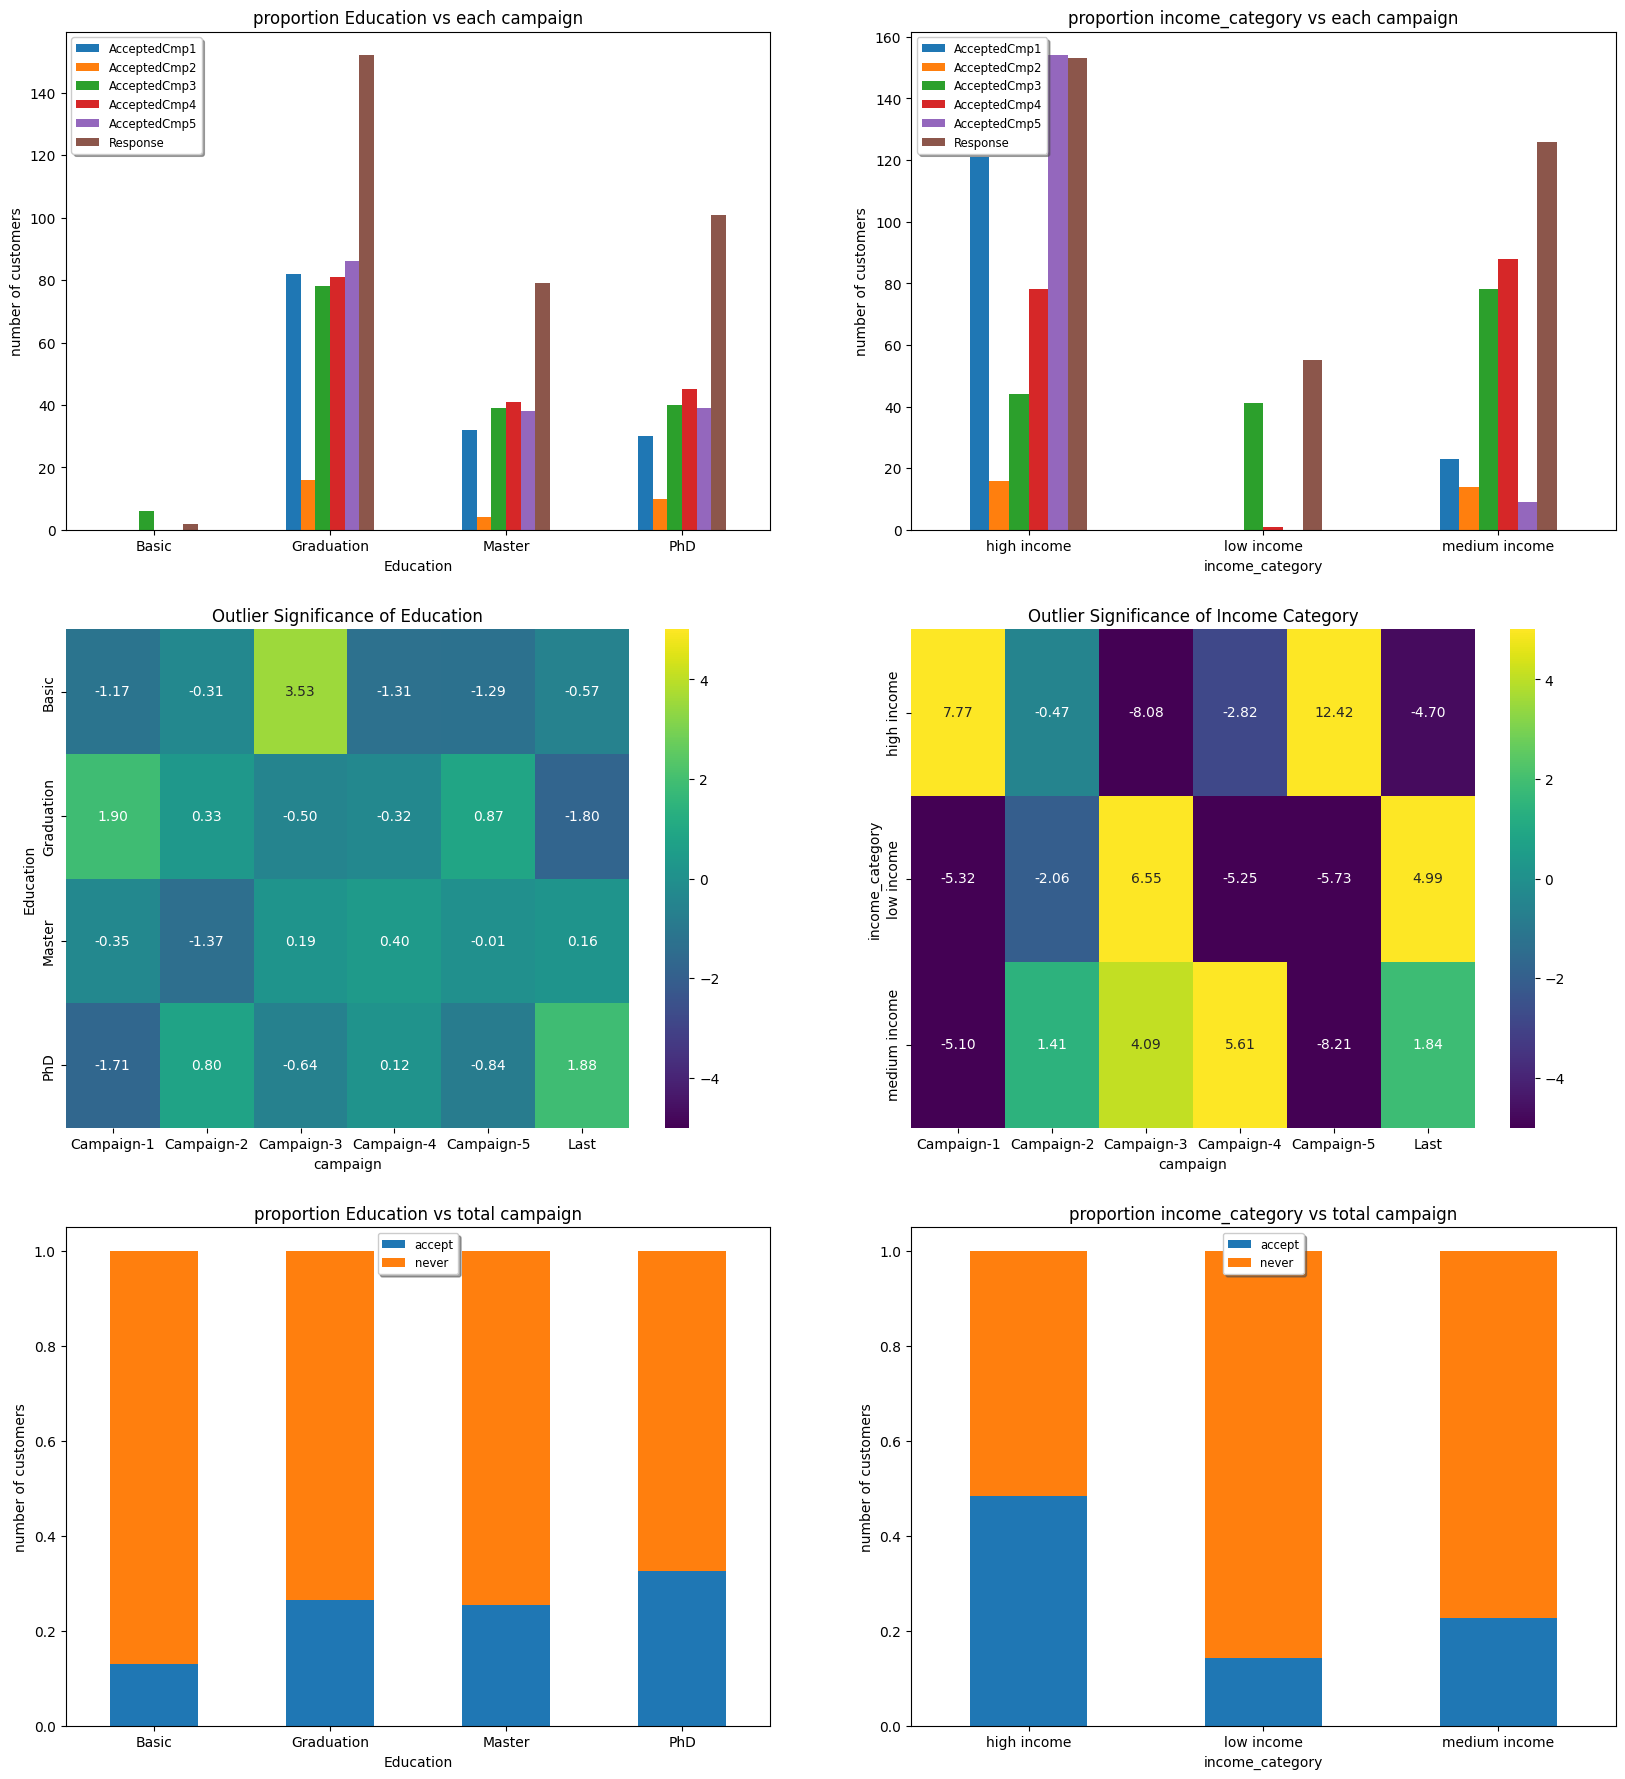

In [157]:
# outlier data for education and income category
outlierEdu = outlier_significance_data[1]
outlierIncome = outlier_significance_data[2]

# make fig and axes
fig, ((ax1,ax2), (ax3,ax4), (ax5,ax6)) = plt.subplots(nrows=3, ncols=2, figsize=(20,22))

axEach = [ax1,ax2]
axOutlier = [ax3,ax4]
axTotal = [ax5,ax6]
dfProp1 = ['dfEdu', 'dfIncome']
outlierData1 = ['outlierEdu', 'outlierIncome']
colList = ['Education', 'income_category']
titleEach = ['proportion Education vs each campaign','proportion income_category vs each campaign']
titleTotal = ['proportion Education vs total campaign','proportion income_category vs total campaign']
titleOutlier = ['Outlier Significance of Education', 'Outlier Significance of Income Category']

for i in zip(axEach, axOutlier, axTotal, dfProp1, outlierData1, colList, titleEach, titleTotal, titleOutlier):
    # data
    df.groupby(i[5])[cols].agg('sum').plot(kind='bar', ax=i[0])
    sns.heatmap(eval(i[4]), vmin=-5, vmax=5, annot=True, cmap="viridis", fmt=".2f", xticklabels=x_axis_labels, ax=i[1])
    eval(i[3]).plot(kind='bar', stacked=True, ax=i[2])
    # set title
    i[0].set_title(i[-3])
    i[1].set_title(i[-1])
    i[2].set_title(i[-2])
    # set x label rotation
    i[0].tick_params(axis='x', labelrotation=360)
    i[1].tick_params(axis='x', labelrotation=360)
    i[2].tick_params(axis='x', labelrotation=360)
    # set y label
    i[0].set_ylabel('number of customers')
    i[2].set_ylabel('number of customers')
    # set legend
    i[0].legend(loc='upper left', fontsize='small', fancybox=True, shadow=True);
    i[2].legend(loc='upper center', fontsize='small', fancybox=True, shadow=True);

**_Insight_**:
<br>
1. **Education level** --> insight can be drawn that `PhD` effective enough in accept campaign than other education level. Berdasarkan grafik outlier significance `PhD` lebih banyak menerima campaign pada `last campaign`.
2. **Income category** --> insight can be drawn that `high income` effective enough in accept campaign than other income category. Berdasarkan grafik outlier significance, `high income` lebih banyak menerima campaign pada `campaign ke-5`.

>### 3. Bagaimana pengaruh setiap kategori (age_category, education, income_category, marital_status, has_child) terhadap **product columns** ? Produk apa yang sering dibeli oleh customer ?

- Berdasarkan jawaban pada question-2 kita sudah mengetahui bagaimana demografi customer based on age category, education, income category, marital status, dan has child/not. Kemudian kita **analisa** bagaimana perilaku spent dari customer berdasarkan demografi tersebut terhadap **product columns**.

**product columns** : MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds
- Kelompok 1:
1. `Income category` --> **high income**
2. `Education level` --> **PhD**
- Kelompok 2
1. `Marital status` --> **widow**
2. `Has child/not` --> **has no child**
- Kelompok 3:
1. `Age categories` --> **old adults (older than 59 years old)**

#### <u>product apa yang sering dibeli oleh kategori customer berdasarkan kelompok 1 dan kelompok 2 ?<u>

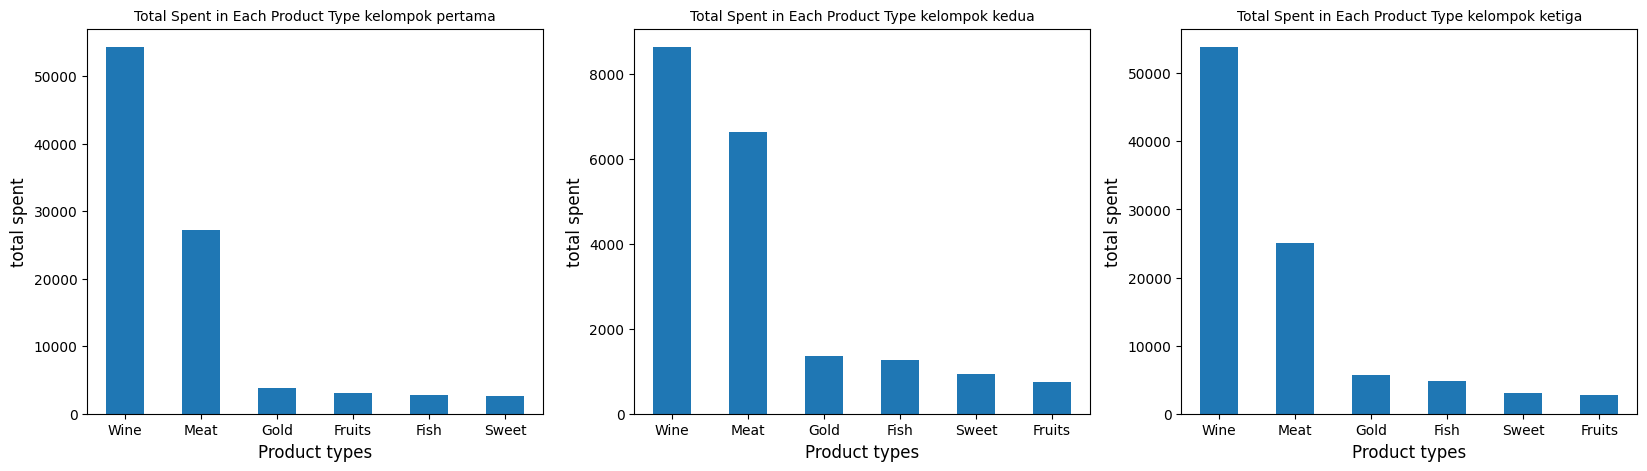

In [158]:
# product columns
colsProd = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, figsize=(20,5))

# set xlabel pandas plot
xlabel = ['Wine', 'Meat', 'Gold', 'Fruits', 'Fish', 'Sweet']
xlabel1 = ['Wine', 'Meat', 'Gold', 'Fish', 'Sweet', 'Fruits']

rows2 = [ax1,ax2,ax3]
title = ["Total Spent in Each Product Type kelompok pertama", "Total Spent in Each Product Type kelompok kedua", "Total Spent in Each Product Type kelompok ketiga"]

for i in zip(rows2, title):
    # plot the data
    df_accept.loc[(df_accept.income_category == 'high income') & (df_accept.Education == 'PhD')][colsProd]\
        .sum().sort_values(ascending=False).plot(kind='bar', ax=ax1)
    df_accept.loc[(df_accept.Marital_Status == 'Widow') & (df_accept.has_child == 'No')][colsProd]\
        .sum().sort_values(ascending=False).plot(kind='bar', ax=ax2)
    df_accept.loc[df_accept.age_category == 'old adults'][colsProd]\
        .sum().sort_values(ascending=False).plot(kind='bar', ax=ax3)
    # title
    i[0].set_title(i[1], fontsize=10)
    # set x and y label
    i[0].set_ylabel("total spent", fontsize=12)
    i[0].set_xlabel("Product types", fontsize=12)
    # set x ticks
    ax1.set_xticklabels(xlabel)
    ax2.set_xticklabels(xlabel1)
    ax3.set_xticklabels(xlabel1)
    # rotate x label
    ax1.tick_params(axis='x', labelrotation = 360)
    ax2.tick_params(axis='x', labelrotation = 360)
    ax3.tick_params(axis='x', labelrotation = 360)

**_Insight_**:
<br>
Pada semua kategori, 2 jenis produk yang menghasilkan amount terbanyak adalah `Wine` dan `Meat`. Selanjutnya kita akan menganalisa berapa **confidence interval for mean** dari total amount yang dikeluarkan customer

Confidence interval for mean in `Wines` and `Meat` product (because based on the graph above wines and meat are mostly purchased by customers)

In [189]:
from scipy.stats import shapiro

# DataFrame kelompok 1, 2, 3
df1 = df_accept.loc[(df_accept.income_category == 'high income') & (df_accept.Education == 'PhD')]
df2 = df_accept.loc[(df_accept.Marital_Status == 'Widow') & (df_accept.has_child == 'No')]
df3 = df_accept.loc[df_accept.age_category == 'old adults']

# check the distribution of amount of Wines
dflist = ['df1', 'df2', 'df3']

for i in dflist:
    # Wine
    stats, pvalue = shapiro(eval(i).MntWines)
    # check the pvalue
    if pvalue > 0.05:
        print(f"pvalue: {pvalue}. So, amount of Wine in {i} has normal distribution")
    else:
        print(f"pvalue: {pvalue}. So, amount of Wine in {i} has NOT normal distribution")

    # Meat
    stats, pvalue = shapiro(eval(i).MntMeatProducts)
    # check the pvalue
    if pvalue > 0.05:
        print(f"pvalue: {pvalue}. So, amount of Meat in {i} has normal distribution")
    else:
        print(f"pvalue: {pvalue}. So, amount of Meat in {i} has NOT normal distribution")

    print(f"\n")

pvalue: 0.03191150724887848. So, amount of Wine in df1 has NOT normal distribution
pvalue: 0.022235536947846413. So, amount of Meat in df1 has NOT normal distribution


pvalue: 0.856632649898529. So, amount of Wine in df2 has normal distribution
pvalue: 0.48389819264411926. So, amount of Meat in df2 has normal distribution


pvalue: 0.006286767777055502. So, amount of Wine in df3 has NOT normal distribution
pvalue: 3.5231714718975127e-06. So, amount of Meat in df3 has NOT normal distribution




Uji shapiro:
<br>
1. Amount of Wine dan Meat di df2 terdistribusi normal
2. Amount of Wine dan Meat di df1 dan df3 terdistribusi tidak normal

In [190]:
# CI for mean amount of Wine dan Meat di df2

# products that make the most money (spent)
prodMost = ['MntWines', 'MntMeatProducts']

# CI for mean in prodMost
for prod in prodMost:
    # mean and std
    mean = df2[prod].mean()
    std = df2[prod].std()
    # get the lowerbound and upperbound
    lower = mean - 1.96 * std / np.sqrt(len(df2))
    upper = mean + 1.96 * std / np.sqrt(len(df2))
    print(f"confidence interval for mean (total_amount) of {prod[prod.find('t')+1:prod.find('P')]} is between {round(lower, 2)} and {round(upper, 2)}")

confidence interval for mean (total_amount) of Wine is between 404.54 and 827.46
confidence interval for mean (total_amount) of Meat is between 342.04 and 605.1


In [193]:
from scipy.special import boxcox, inv_boxcox
from scipy import stats

def normaltransform(df,cols):
    """Function to find CI for mean (if the data distribution is not normal)
    
    Args:
        df : DataFrame
        cols (string) : name of your column

    Return:
        lower, upper of CI for mean
    """
    # values of Wine in df1
    x = df[cols]

    # box-cox transform
    xt, lmbda = stats.boxcox(x)

    # 95% confidence interval of mean in a transformed scale
    lo_xt, hi_xt = stats.t.interval(1 - 0.05, len(xt) - 1, loc=np.mean(xt), scale=stats.sem(xt))
    lo_x, hi_x = inv_boxcox(lo_xt, lmbda), inv_boxcox(hi_xt, lmbda)

    # inverse transform
    lo_x, hi_x = inv_boxcox(lo_xt, lmbda), inv_boxcox(hi_xt, lmbda)

    return lo_x, hi_x

In [194]:
# CI for mean Wine and Meat in df1
for cols in prodMost:
    lowerdf1, upperdf1 = normaltransform(df1,cols)
    print(f"confidence interval for mean (total_amount) of {cols[cols.find('t')+1:cols.find('P')]} in df1 is between {round(lowerdf1, 2)} and {round(upperdf1, 2)}")

print(f'\n')

# CI for mean Wine and Meat in df3
for cols in prodMost:
    lowerdf1, upperdf1 = normaltransform(df3,cols)
    print(f"confidence interval for mean (total_amount) of {cols[cols.find('t')+1:cols.find('P')]} in df3 is between {round(lowerdf1, 2)} and {round(upperdf1, 2)}")

confidence interval for mean (total_amount) of Wine in df1 is between 800.94 and 978.04
confidence interval for mean (total_amount) of Meat in df1 is between 353.93 and 472.11


confidence interval for mean (total_amount) of Wine in df3 is between 513.16 and 696.72
confidence interval for mean (total_amount) of Meat in df3 is between 162.82 and 268.39


**_Insight_**:
<br>
1. Kelompok 1: `Income category` --> **high income** dan `Education level` --> **PhD**
- Wine : Confidence interval for mean of total spent pada produk Wine berada diantara **800.94 sampai 978.04**
- Meat : Confidence interval for mean of total spent pada produk Meat berada diantara **353.93 sampai 472.11**
2. Kelompok 2: `Marital status` --> **widow** dan `Has child/not` --> **has no child**
- Wine : Confidence interval for mean of total spent pada produk Wine berada diantara **404.54 sampai 827.46**
- Meat : Confidence interval for mean of total spent pada produk Meat berada diantara **342.04 sampai 605.1**
3. Kelompok 3: `Age categories` --> **old adults (older than 59 years old)**
- Wine : Confidence interval for mean of total spent pada produk Wine berada diantara **513.16 sampai 696.72**
- Meat : Confidence interval for mean of total spent pada produk Meat berada diantara **162.82 sampai 268.39**

>### 4. Bagaimana pengaruh setiap kategory (age_category, education, income_category, marital_status, has_child) terhadap **place** ?

place columns: NumWebPurchases, NumCatalogPurchases, NumStorePurchases

In [231]:
df_accept[placeCols].sum()

NumWebPurchases        3083
NumCatalogPurchases    2514
NumStorePurchases      4026
dtype: int64

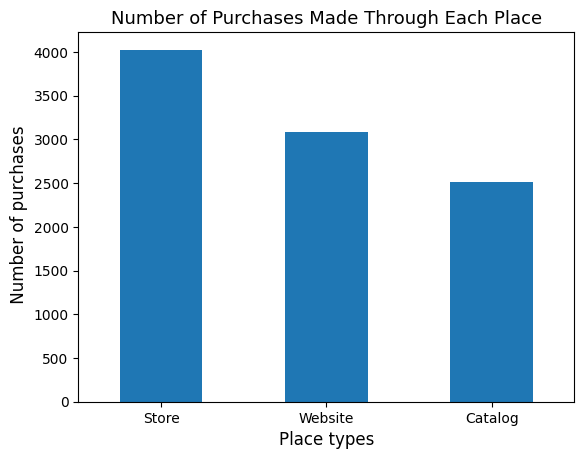

In [229]:
# place columns
placeCols = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']

# plot data
df_accept[placeCols].sum().sort_values(ascending=False).plot(kind='bar')

# title
plt.title("Number of Purchases Made Through Each Place", fontsize=13)

# set x and y label
plt.ylabel(" Number of purchases", fontsize=12)
plt.xlabel("Place types", fontsize=12)
plt.xticks(ticks=[0,1,2], labels=['Store', 'Website', 'Catalog'], fontsize=10)

# rotate x label
plt.tick_params(axis='x', labelrotation=360);

**_Insight_**:
<br>
The highest number of purchases made by customers is through the `Store`.

## `Kesimpulan`
Berdasarkan hasil analisa yang telah dilakukan dapat ditarik kesimpulan bahwa:
1. Jika dilihat dari jumlah pemasukan uang untuk perusahaan yang dihasilkan dari pembelian produk oleh customers, maka dapat dikatakan bahwa campaign sudah **efektif**.
2. Berdasarkan kategori umur, education level, marital status, memiliki anak/tidak, dan kategori income, maka dapat dibagi ke dalam 3 kelompok segmentasi yang accept campaign:
<br>
a. Kelompok 1 dari segi kategori gaji dan education level --> customer yang accept campaign berada pada kategori **gaji yang tinggi** dan education level-nya **PhD**
<br>
b. Kelompok 2 dari segi marital status dan memiliki anak/tidak --> customer yang accept campaign berada pada kategori **widow** dan **tidak memiliki anak**
<br>
c. Kelompok 3 dari segi kategori umur --> customer yang accept campaign berada pada kategori **old adults (lebih dari 59 tahun)**
3. Produk yang menghasil pemasukan uang tertinggi bagi perusahaan adalah produk **Wine** dan **Meat**.
4. Customer yang accept campaign paling banyak melakukan pembelian di-Store secara langsung sebanyak **4026** pembelian.

## `Rekomendasi`:
Jika perusahaan ingin melakukan campaign lagi, maka campaign bisa diprioritaskan untuk customer yang berumur lebih dari 59 tahun, gaji yang tinggi, education level-nya PhD, status pernikahannya widow, dan tidak memiliki anak. Kemudian jika ditinjau dari segi produk, perusahaan bisa melakukan campaign (promosi) untuk produk Wine dan Meat, karena produk ini sering dibeli oleh customer. Selanjutnya, campaign bisa dilakukan di-Store secara langsung.

-----------
-----------